# create figures for HOT1A3 DE long term 

In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(ggrepel)

In [3]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [4]:
hpath_fname = file.path('..', 'genomes', 'HOT1A3', 'HOT1A3_protein_list.csv')
hpath_df = read.csv(hpath_fname)


In [5]:
df_all_orig = read_csv(file.path('DE_results', 'HOT1A3_all_FC_results.csv'))



Rows: 47723 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): contrast, gene_id, Assay, contrast1
dbl (5): logFC, AveExpr, pvalue, padj, Length
lgl (2): down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
df_all_orig = df_all_orig %>%
    filter(contrast1 %in% c('LATEvsC1_prot', 'LATEvsC1P1_rna'))

In [7]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [8]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [9]:
names(hpath_df); names(df_all_orig)

[1] "seq_id"             "Name"               "gene"              
 [4] "gene_synonym"       "locus_tag"          "old_locus_tag"     
 [7] "source"             "start"              "end"               
[10] "strand"             "Note"               "exception"         
[13] "inference"          "product"            "protein_id"        
[16] "gene_length"        "path_id"            "main"              
[19] "sub"                "path"               "ecpath"            
[22] "Category"           "Membrane.transport" "kegg_gene1"        
[25] "kegg_gene2"

[1] "contrast"  "gene_id"   "logFC"     "AveExpr"   "pvalue"    "padj"     
 [7] "Assay"     "contrast1" "Length"    "down"      "up"

In [10]:
df_all = left_join(df_all_orig, hpath_df, by=c('gene_id'='locus_tag'))

In [11]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,1849
Genetic Info,891
Uncharacterized,866
Membrane transport,545
Metabolism,535
AA/Nucleotide,483
Env. Info/Cellular Process,444
Energy/Carbohydrate/Glycan,420
AA/Nucleotide;Energy/Carbohydrate/Glycan,130


In [12]:
unique(df_all$contrast1)

[1] "LATEvsC1_prot"  "LATEvsC1P1_rna"

In [13]:
t(head(df_all))

contrast,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1
gene_id,ACZ81_RS19455,ACZ81_RS09835,ACZ81_RS17215,ACZ81_RS18535,ACZ81_RS16015,ACZ81_RS08650
logFC,3.425751,3.814822,4.431088,6.371636,2.278657,2.519997
AveExpr,0.4518796,-1.6259760,0.7089464,-1.6227350,0.8062054,0.5599381
pvalue,3.279169e-13,9.219157e-13,2.765118e-12,5.356480e-12,9.740853e-12,1.357234e-11
padj,7.292872e-10,1.025170e-09,2.049874e-09,2.978203e-09,4.332731e-09,5.030813e-09
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot
Length,1776,3057,4536,2406,1497,2121
down,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
up,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [14]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,508
Proteome,TRUE,526
RNA,FALSE,137
RNA,TRUE,332


# Top up and down regulated genes

In [15]:
df_all %>%
    filter(padj < 0.05) %>% top_n(-50, logFC) %>% 
    select(Assay,logFC,gene, product, Category) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category
<chr>,<dbl>,<chr>,<chr>,<chr>
Proteome,-3.281856,,c-type cytochrome,Other
Proteome,-3.252276,,HlyD family efflux transporter periplasmic adaptor subunit,Env. Info/Cellular Process
Proteome,-4.094447,,hypothetical protein,Uncharacterized
Proteome,-2.929366,cyoB,cytochrome o ubiquinol oxidase subunit I,Energy/Carbohydrate/Glycan
Proteome,-2.958181,,DUF3360 family protein,Other
Proteome,-3.124226,(plsC),1-acylglycerol-3-phosphate O-acyltransferase,Metabolism
Proteome,-2.858323,,hypothetical protein,Uncharacterized
RNA,-4.601784,(ompW),outer membrane beta-barrel protein,Env. Info/Cellular Process
RNA,-2.958735,,hypothetical protein,Uncharacterized


In [16]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [17]:
dput(names(df_all))

c("contrast", "gene_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "Length", "down", "up", "seq_id", "Name", 
"gene", "gene_synonym", "old_locus_tag", "source", "start", "end", 
"strand", "Note", "exception", "inference", "product", "protein_id", 
"gene_length", "path_id", "main", "sub", "path", "ecpath", "Category", 
"Membrane.transport", "kegg_gene1", "kegg_gene2")


In [18]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [19]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [20]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ACZ81_RS12900,(lctP),L-lactate permease,09183 Protein families: signaling and cellular processes,02000 Transporters [BR:ko02000],1.1407693,1.077134e-03,6.0828544,1.724072e-178
ACZ81_RS04455,,DUF3718 domain-containing protein,,,NA,NA,5.5589997,2.866275e-10
ACZ81_RS16055,lldD,FMN-dependent L-lactate dehydrogenase LldD,09101 Carbohydrate metabolism,00620 Pyruvate metabolism [PATH:ko00620],0.3449768,2.992070e-01,5.1968949,2.301139e-123
ACZ81_RS08480,(gst),glutathione S-transferase,09106 Metabolism of other amino acids;09111 Xenobiotics biodegradation and metabolism;09183 Protein families: signaling and cellular processes,00480 Glutathione metabolism [PATH:ko00480];00980 Metabolism of xenobiotics by cytochrome P450 [PATH:ko00980];00982 Drug metabolism - cytochrome P450 [PATH:ko00982];00983 Drug metabolism - other enzymes [PATH:ko00983];02000 Transporters [BR:ko02000],2.0716052,2.559613e-01,5.0772892,1.253030e-12
ACZ81_RS01815,glnK,P-II family nitrogen regulator,09192 Unclassified: genetic information processing,99973 Transcription,-0.4750515,2.677148e-01,5.0730796,1.056437e-15
ACZ81_RS17215,,DUF11 domain-containing protein,,,4.4310883,2.049874e-09,3.5763164,3.513435e-08
ACZ81_RS18535,,TonB-dependent receptor,09183 Protein families: signaling and cellular processes,02000 Transporters [BR:ko02000],6.3716359,2.978203e-09,2.8198139,4.245674e-04
ACZ81_RS18525,"(xylS,yicI)",alpha-xylosidase,09191 Unclassified: metabolism,99980 Enzymes with EC numbers,3.8861596,6.148672e-09,1.4002939,1.018893e-01
ACZ81_RS18505,,TauD/TfdA family dioxygenase,,,3.9228422,1.876686e-07,1.3265660,4.798479e-02


In [21]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ACZ81_RS03605,,thermostable hemolysin,,,NA,NA,-5.2685226,3.578645e-09
ACZ81_RS20705,,MerR family DNA-binding protein,09182 Protein families: genetic information processing,03000 Transcription factors [BR:ko03000],NA,NA,-4.6426955,7.098194e-11
ACZ81_RS00135,(ompW),outer membrane beta-barrel protein,09193 Unclassified: signaling and cellular processes,99992 Structural proteins,1.2374359,1.719940e-02,-4.6017837,2.297168e-07
ACZ81_RS01465,(mcp),methyl-accepting chemotaxis protein,09132 Signal transduction;09142 Cell motility;09183 Protein families: signaling and cellular processes,02020 Two-component system [PATH:ko02020];02030 Bacterial chemotaxis [PATH:ko02030];02035 Bacterial motility proteins [BR:ko02035],-0.1436424,7.465002e-01,-4.2058962,8.504194e-14
ACZ81_RS05055,"(fliC,hag)",flagellin,09132 Signal transduction;09142 Cell motility;09183 Protein families: signaling and cellular processes,02020 Two-component system [PATH:ko02020];02035 Bacterial motility proteins [BR:ko02035];02040 Flagellar assembly [PATH:ko02040],1.6642990,5.857775e-03,-4.0701057,1.001155e-15
ACZ81_RS04240,,HlyD family efflux transporter periplasmic adaptor subunit,09193 Unclassified: signaling and cellular processes,99992 Structural proteins,-3.2522759,1.876686e-07,-3.3200845,4.406381e-06
ACZ81_RS10345,,c-type cytochrome,,,-3.2818561,1.418663e-08,-2.7787492,2.255986e-04
ACZ81_RS21255,,hypothetical protein,,,-4.0944475,1.615113e-05,-1.6927050,1.845352e-03
ACZ81_RS15575,(plsC),1-acylglycerol-3-phosphate O-acyltransferase,09103 Lipid metabolism;09181 Protein families: metabolism,00561 Glycerolipid metabolism [PATH:ko00561];00564 Glycerophospholipid metabolism [PATH:ko00564];01004 Lipid biosynthesis proteins [BR:ko01004],-3.1242258,1.204542e-03,0.8634743,5.465103e-01


# Vulcano plot

In [22]:
df_degenes2 = df_all %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>2)

In [23]:
df_degenes = df_all %>% 
    filter(padj < 0.05) 

In [24]:
df_degenes2 %>% count(Assay, Category) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )

Category,Proteome,RNA
<chr>,<int>,<int>
Other,39,58
Membrane transport,17,16
Uncharacterized,13,31
Energy/Carbohydrate/Glycan,11,7
Metabolism,9,13
Genetic Info,7,6
AA/Nucleotide,6,13
AA/Nucleotide;Energy/Carbohydrate/Glycan,6,2
Env. Info/Cellular Process,5,23


In [25]:
# these are all pseudo genes
df_all %>% filter(is.na(Category)) #%>% count(product)

contrast,gene_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,Length,down,⋯,gene_length,path_id,main,sub,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
treatment_long.term_vs_ref,ACZ81_RS05415,-2.27592002,6219.0097999,1.499474e-09,6.416769e-08,RNA,LATEvsC1P1_rna,431,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS05650,0.04903607,18.3616232,1.000000e+00,1.000000e+00,RNA,LATEvsC1P1_rna,1196,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS07580,0.44548192,128.2058414,1.000000e+00,1.000000e+00,RNA,LATEvsC1P1_rna,1155,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS09060,-2.23711814,25.9509129,9.010488e-05,1.343723e-03,RNA,LATEvsC1P1_rna,873,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS09190,0.45872045,1596.7074464,1.000000e+00,1.000000e+00,RNA,LATEvsC1P1_rna,1152,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS10325,-2.14151125,318.7353911,1.517995e-11,9.194379e-10,RNA,LATEvsC1P1_rna,1194,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS10515,-0.17723141,1540.9505930,1.000000e+00,1.000000e+00,RNA,LATEvsC1P1_rna,2108,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS11070,0.83897906,144.9519765,1.115509e-01,5.415240e-01,RNA,LATEvsC1P1_rna,2163,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
treatment_long.term_vs_ref,ACZ81_RS14350,-1.34210563,129.4373771,4.611961e-03,4.089479e-02,RNA,LATEvsC1P1_rna,2163,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [26]:
df_all = df_all %>% filter(!is.na(Category)) #%>% count(product)


In [27]:
category_move_to_other = c('Env. Info/Cellular Process', 'Genetic Info')
category_move_to_metabolism = c('Energy/Carbohydrate/Glycan')
category_move_to_aa = c('AA/Nucleotide;Energy/Carbohydrate/Glycan')
df_all = df_all %>%
    mutate(Category2 = Category) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_other, 'Other', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_metabolism, 'Metabolism', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_aa, 'AA/Nucleotide', Category2)) 

In [28]:
df_all %>% count(Assay, Category2) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )


Category2,Proteome,RNA
<chr>,<int>,<int>
Other,1134,2050
Metabolism,398,557
AA/Nucleotide,285,328
Membrane transport,208,337
Uncharacterized,196,670
Nitrogen metabolism,7,13
,1,2


In [29]:
df_degenes%>% count(gene) %>% arrange()

gene,n
<chr>,<int>
,785
(acd),2
(aceA),1
"(aceB,glcB)",1
(ackA),1
(acnB),1
(acpP),1
"(acrA,mexA,adeI,smeD,mtrC,cmeA)",2
(aer),1


In [30]:
names(df_all)

[1] "contrast"           "gene_id"            "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Length"            
[10] "down"               "up"                 "seq_id"            
[13] "Name"               "gene"               "gene_synonym"      
[16] "old_locus_tag"      "source"             "start"             
[19] "end"                "strand"             "Note"              
[22] "exception"          "inference"          "product"           
[25] "protein_id"         "gene_length"        "path_id"           
[28] "main"               "sub"                "path"              
[31] "ecpath"             "Category"           "Membrane.transport"
[34] "kegg_gene1"         "kegg_gene2"         "Category2"

In [31]:
df_all$log.padj = -log10(df_all$padj)

In [32]:
dput(unique(df_all$Category2))

c("Other", "Membrane transport", "AA/Nucleotide", "Metabolism", 
"Uncharacterized", "Nitrogen metabolism", "")


In [33]:
cat_order = c(
    "Nitrogen metabolism", 
    "Photosynthesis/Carbon fixation", 
    "AA/Nucleotide", 
    "Membrane transport", 
    "Uncharacterized", 
    "high light inducible",
    "Metabolism", 
    "Other"
)


my.cols <- c(
  "Nitrogen metabolism" = "#1b9e77",         # Teal green
  "Photosynthesis/Carbon fixation" = "#66a61e",            # Olive green
  "AA/Nucleotide" = "#7570b3",              # Purple
  "Membrane transport" = "#e7298a",         # Pink
  "Uncharacterized" = "#d95f02",  # Orange
  "high light inducible" = "#e6ab02",       # Mustard yellow
  #"Metabolism" = "#c0c0c0",                 # Brown
  "Metabolism" = "#a6761d",                 # Brown
  "Other" = "#b0b0b0"                       # Gray
)

df_all$Category2 = factor(df_all$Category2, levels = cat_order)

#my.cols <- c(brewer.pal(length(unique(df_all$Category2))-1, "Set3"), 'grey34')

In [34]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

In [35]:
colSums(is.na(df_all))

contrast            gene_id              logFC            AveExpr 
                 0                  0                  0                  0 
            pvalue               padj              Assay          contrast1 
                 0                 74                  0                  0 
            Length               down                 up             seq_id 
                 0                 44                 30                  0 
              Name               gene       gene_synonym      old_locus_tag 
                 0                  0                  0                  0 
            source              start                end             strand 
                 0                  0                  0                  0 
              Note          exception          inference            product 
                 0                  0                  0                  0 
        protein_id        gene_length            path_id               main 
                 0                  0                  0                  0 
               sub               path             ecpath           Category 
                 0                  0                  0                  0 
Membrane.transport         kegg_gene1         kegg_gene2          Category2 
                 0                  0                  0                  3 
          log.padj 
                74

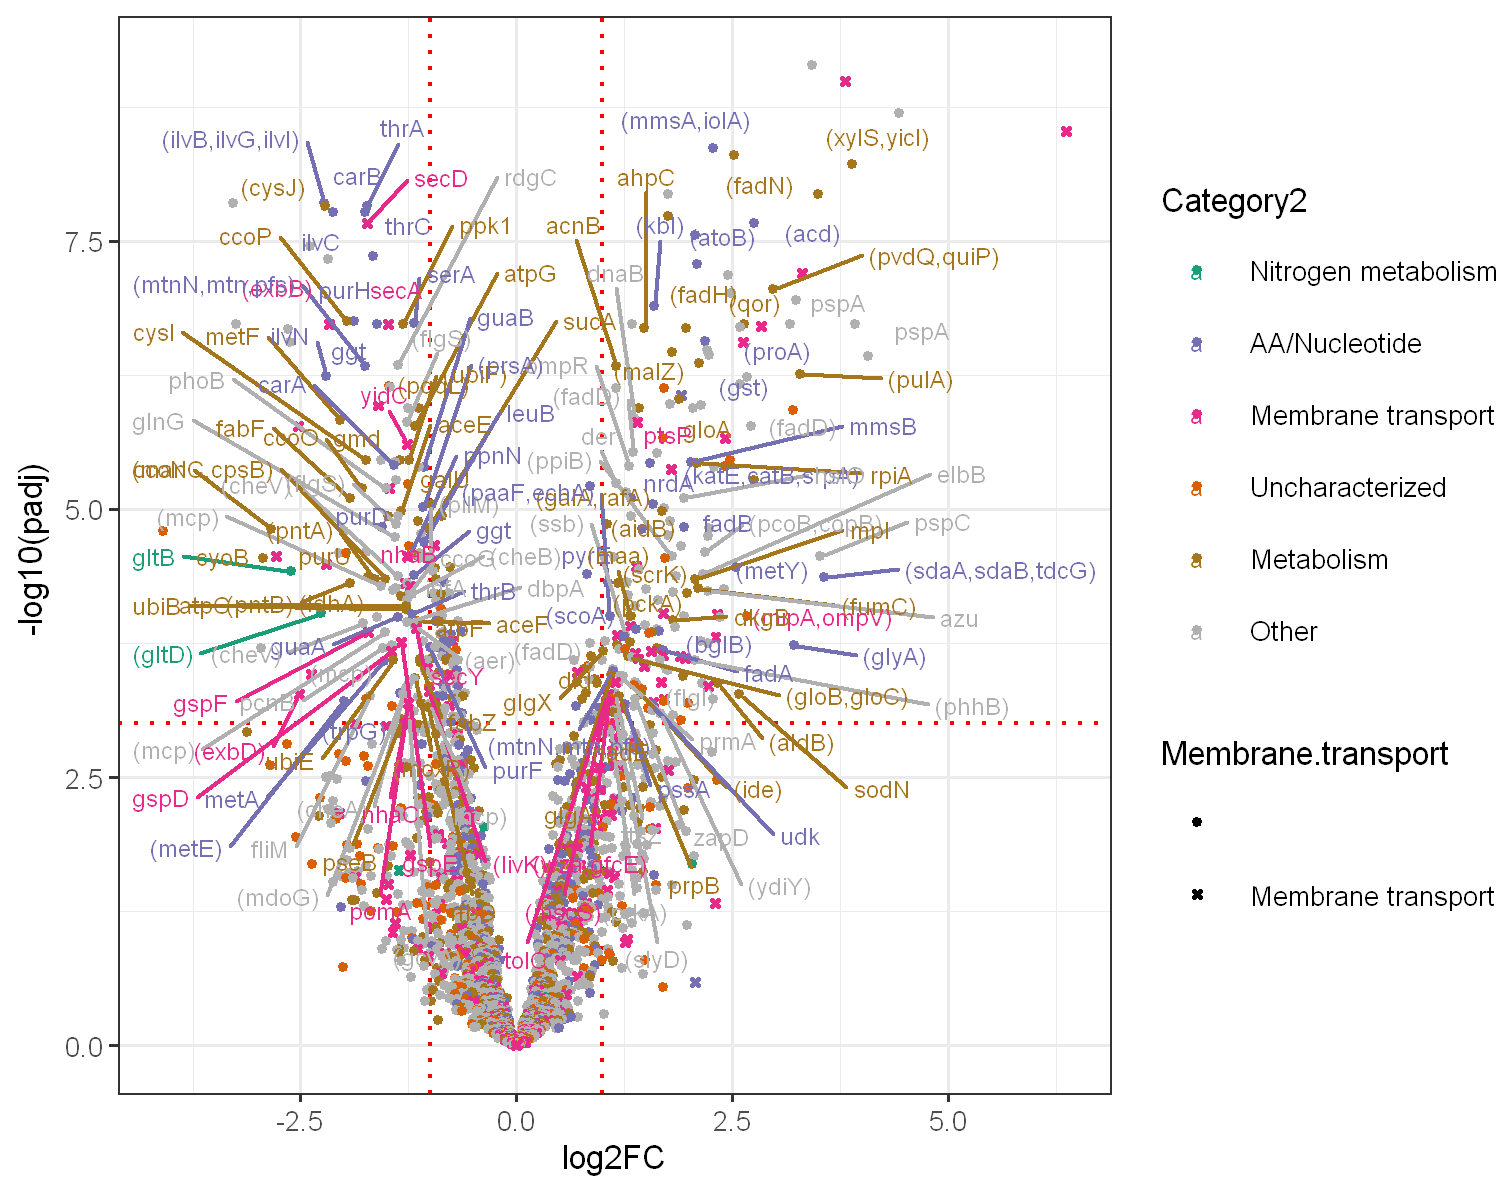

In [40]:
library(ggrepel)
assay = 'Proteome'

df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    geom_point(size=0, stroke=1 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=2)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [41]:
ggsave('figures/HOT1A3_longterm_DE_Proteome.svg')

Saving 6.67 x 6.67 in image


Warning message:
"Removed 74 rows containing missing values (`geom_point()`)."


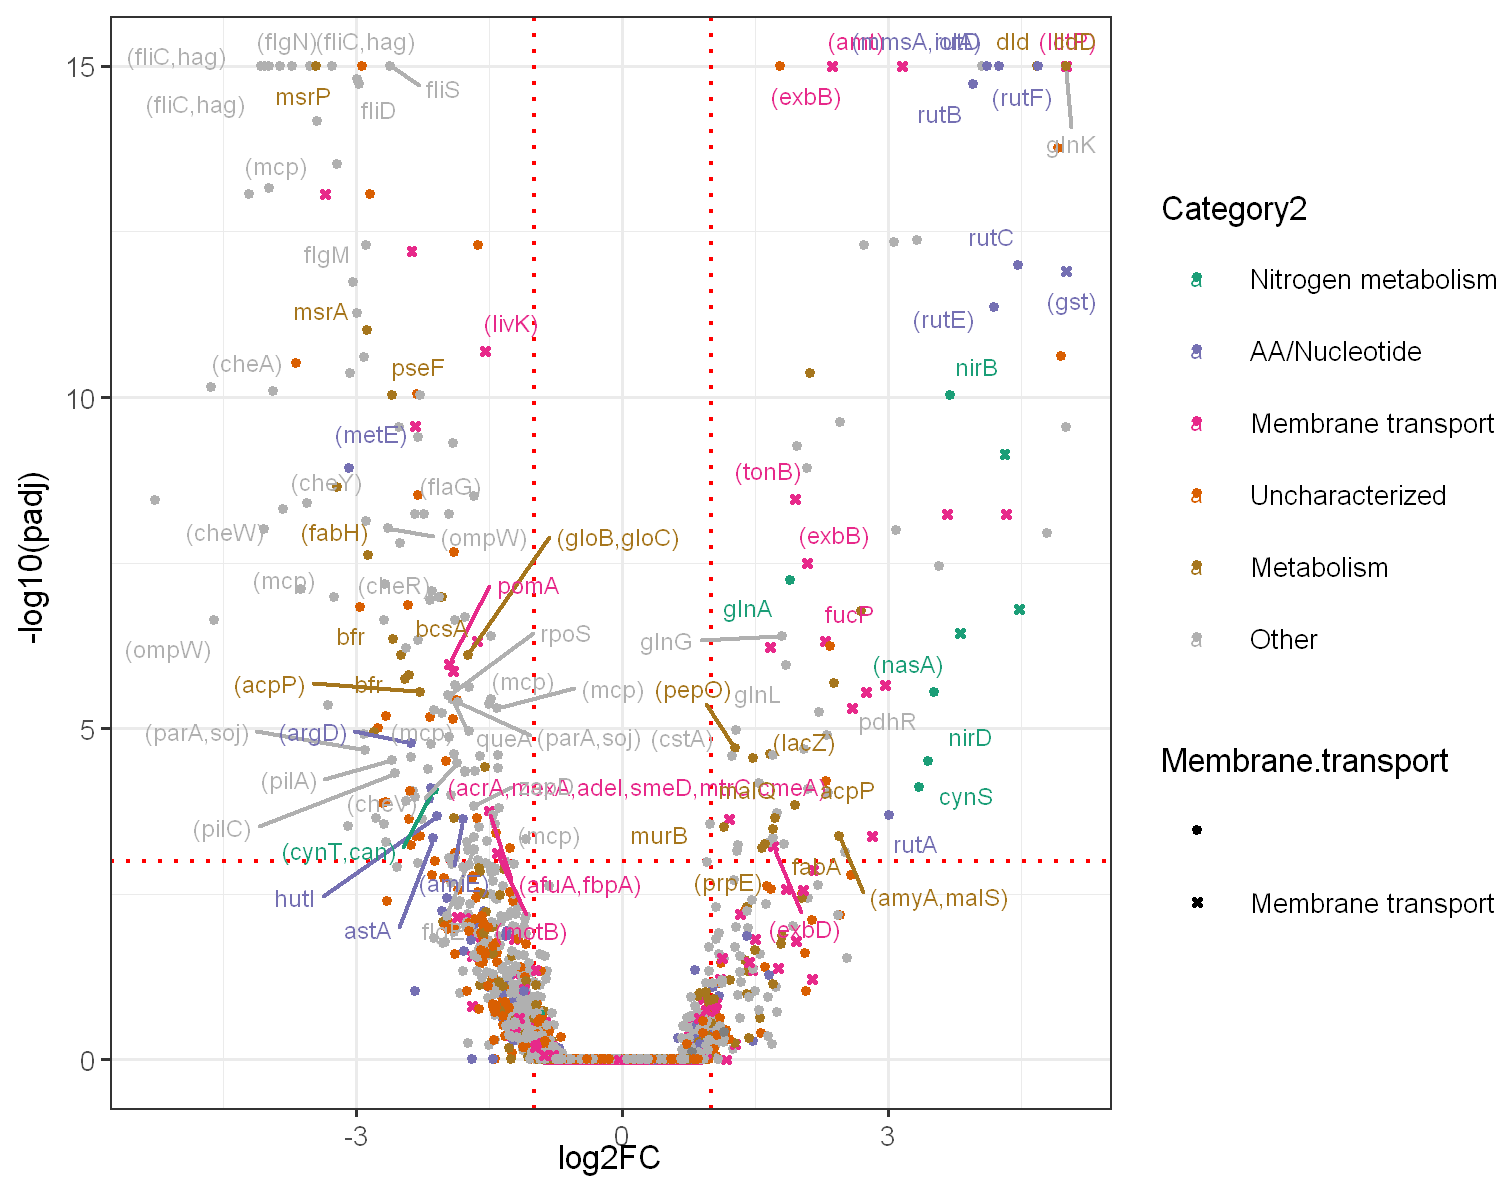

In [44]:
library(ggrepel)
assay = 'RNA'


ymax <- 15
df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
xmax <- 5
df_all$capped.logFC <- pmin(df_all$logFC, xmax)


df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = capped.logFC, y =capped.log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    geom_point(size=0, stroke=1 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( capped.logFC, capped.log.padj ,label=gene), max.overlaps = Inf, size=2)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [45]:
ggsave('figures/HOT1A3_longterm_DE_RNA.svg')

Saving 6.67 x 6.67 in image
Warning message:
"Removed 74 rows containing missing values (`geom_point()`)."


In [ ]:
df_all$kegg_gene

In [ ]:
help(left_join)